Sections:


1. <a href="#sec1"> Imports </a>
2. <a href="#sec2"> Load data </a>
3. <a href="#sec3"> Visualizing and exploring data </a>
    * <a href="#sec30"> data reshaping </a>
    * <a href="#sec31"> visualization </a>
    * <a href="#sec32"> mean image per class </a>
    * <a href="#sec33"> mean image pixels per class </a>
4. <a href="#sec4"> Pre-processing </a>
    * <a href="#sec41"> labels </a>
    * <a href="#sec42"> data normalization </a>
    * <a href="#sec43"> data split </a>
5. <a href="#sec5"> Define and train model </a>
6. <a href="#sec6"> Evaluate model </a>
7. <a href="#sec7"> Predict on test data </a>
    * <a href="#sec71"> generate submission </a>
8. <a href="#sec8"> Potential next steps </a>


<a id="sec1"></a>
## 1. Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<a id="sec2"></a>
## 2. Load data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train_temp = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])

x_test = np.array(df_test)

<a id="sec3"></a>
## 3. Visualizing and exploring data

<a id="sec30"></a>
### data reshaping

In [7]:
N_train_samples = x_train_temp.shape[0]
x_train = x_train_temp.reshape(N_train_samples, 28, 28, 1)

<a id="sec31"></a>
### visualization

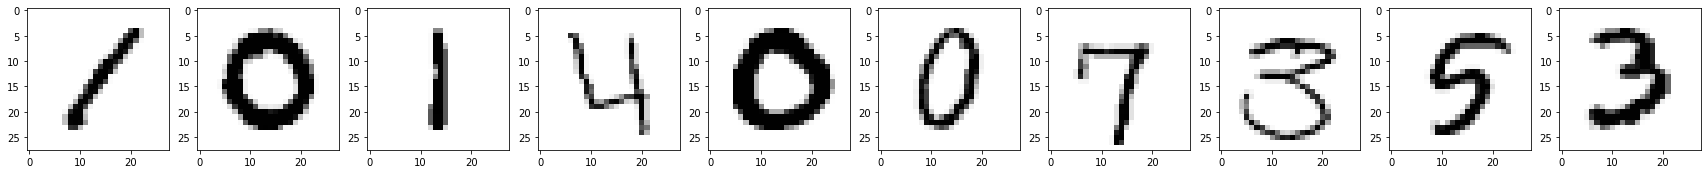

In [8]:
plt.figure(figsize=(30, 15))

n = 10

for i in range(n):
    plt.subplot(1, n, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='Greys')
plt.show()

<a id="sec32"></a>
### mean image per class

In [9]:
def get_class_arrays(class_index):
    return x_train[y_train==class_index],y_train[y_train==class_index]

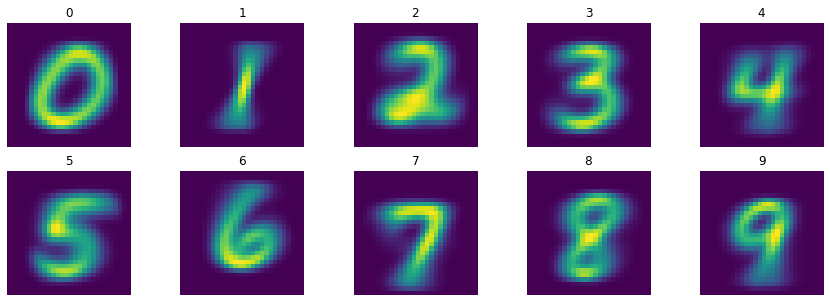

In [10]:
def get_mean_images():
    for i in range(10):
        class_arrayX, class_arrayY = get_class_arrays(i)
        mean_image = class_arrayX.mean(axis=0)
        plt.subplot(2, 5, i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image.squeeze())
        
plt.figure(figsize=(15, 5))
get_mean_images()

<a id="sec33"></a>
### mean image pixels per class

mean images distribution (mean of all pixels, from all images per class). Note that pixel values are in range 0-255.

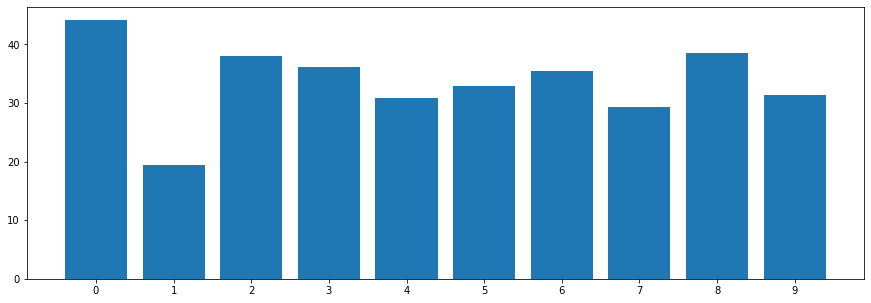

In [11]:
def get_mean_barchart():
    mean_values =[]
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_values.append(class_arrayX.mean())
    
    plt.bar(np.arange(10), mean_values)
    plt.xticks(np.arange(10))
    
plt.figure(figsize=(15, 5))
get_mean_barchart()

<a id="sec4"></a>
## 4. Pre-processing

<a id="sec41"></a>
### labels

In [12]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [13]:
y_cat_train = to_categorical(y_train)
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="sec42"></a>
### data normalization

In [14]:
x_train = x_train/255

##### <a id="sec43"></a>
### data split

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_cat_train, test_size=0.2, random_state=42)

<a id="sec5"></a>
## 5. Define and train model

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

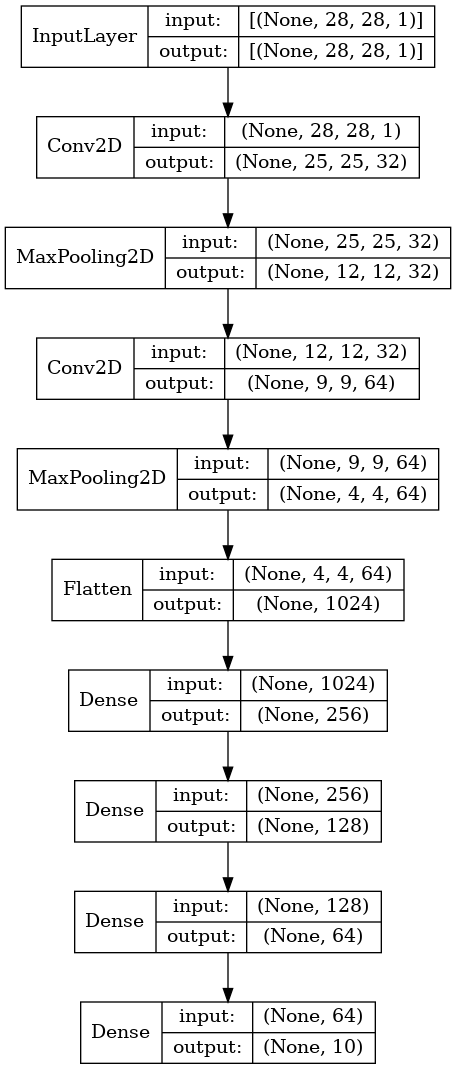

In [20]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [18]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5)

In [19]:
# TRAIN MODEL

model.fit(X_train,
          Y_train, 
          epochs=30, 
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/30
1050/1050 [==============================] - 21s 20ms/step - loss: 0.4283 - accuracy: 0.8622 - val_loss: 0.0655 - val_accuracy: 0.9782
Epoch 2/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0508 - val_accuracy: 0.9836
Epoch 3/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0424 - accuracy: 0.9877 - val_loss: 0.0461 - val_accuracy: 0.9851
Epoch 4/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0420 - val_accuracy: 0.9871
Epoch 5/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.0728 - val_accuracy: 0.9813
Epoch 6/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.0459 - val_accuracy: 0.9882
Epoch 7/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0908 -

<a id="sec6"></a>
## 6. Evaluate model

In [21]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.192777,0.939018,0.065538,0.978214
1,0.060813,0.981458,0.050756,0.983571
2,0.042879,0.986875,0.046145,0.985119
3,0.033462,0.989851,0.042024,0.987143
4,0.025388,0.992232,0.072790,0.981310
5,0.021879,0.993720,0.045945,0.988214
6,0.019298,0.993958,0.090810,0.976905
7,0.017396,0.994732,0.038267,0.988452
8,0.012055,0.996518,0.056960,0.986310
9,0.013394,0.996310,0.054085,0.987976


<AxesSubplot:>

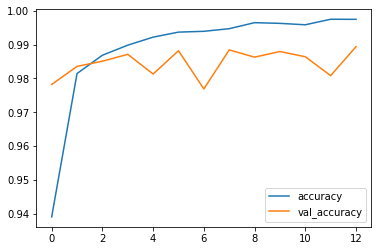

In [22]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

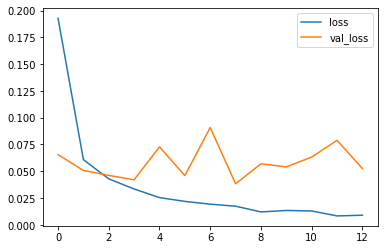

In [23]:
losses[['loss','val_loss']].plot()

In [24]:
pred_val = np.argmax(model.predict(X_val), axis=1)
real_val = np.argmax(Y_val, axis=1)

In [25]:
print(classification_report(real_val, pred_val))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       816
           1       1.00      0.99      1.00       909
           2       0.98      0.99      0.99       846
           3       1.00      0.98      0.99       937
           4       0.99      0.99      0.99       839
           5       0.98      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.98      1.00      0.99       893
           8       0.99      0.98      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [26]:
confusion_matrix(real_val, pred_val)

array([[811,   0,   0,   0,   0,   1,   0,   1,   1,   2],
       [  0, 904,   3,   0,   0,   0,   1,   1,   0,   0],
       [  0,   1, 836,   0,   3,   0,   0,   5,   1,   0],
       [  0,   0,   6, 919,   0,   5,   0,   6,   1,   0],
       [  2,   0,   0,   0, 831,   0,   3,   1,   0,   2],
       [  0,   0,   0,   1,   0, 695,   1,   0,   1,   4],
       [  2,   0,   1,   0,   1,   3, 778,   0,   0,   0],
       [  0,   1,   2,   0,   1,   0,   0, 889,   0,   0],
       [  0,   2,   1,   2,   2,   3,   0,   1, 822,   2],
       [  0,   0,   0,   0,   5,   1,   0,   2,   4, 826]])

<a id="sec7"></a>
## 7. Predict on test data

In [27]:
N_test_samples = x_test.shape[0]

x_test_new = x_test.reshape(N_test_samples, 28, 28, 1)
x_test_new = x_test_new/255

x_test_new.shape

(28000, 28, 28, 1)

In [28]:
predictions = model.predict(x_test_new)

print(predictions.shape)

predictions

(28000, 10)


array([[8.3237376e-20, 7.4125578e-19, 1.0000000e+00, ..., 2.0788091e-17,
        2.2613107e-15, 1.3996537e-20],
       [9.9999869e-01, 2.8409142e-10, 6.3796848e-09, ..., 1.6316175e-10,
        4.6223146e-08, 1.1993141e-06],
       [2.5253614e-08, 1.1130692e-07, 4.3160764e-09, ..., 3.9671509e-06,
        1.8817182e-06, 9.9997759e-01],
       ...,
       [1.5138534e-21, 3.9181484e-16, 9.3366163e-15, ..., 1.1563362e-14,
        3.6707397e-13, 4.2787139e-13],
       [8.2531841e-08, 1.1797454e-07, 9.3131671e-09, ..., 1.7995756e-06,
        8.3158733e-07, 9.9998462e-01],
       [3.8998438e-20, 2.3338279e-18, 1.0000000e+00, ..., 2.1655152e-17,
        7.6725362e-15, 6.5374152e-20]], dtype=float32)

In [29]:
final_pred = np.argmax(predictions, axis=1)

final_pred

array([2, 0, 9, ..., 3, 9, 2])

Predicted value: 5



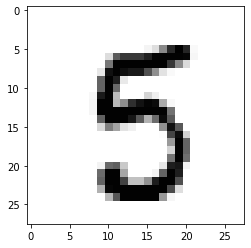

In [30]:
# Visualize some test prediction and corresponding digit 

test_index = 10

plt.imshow(x_test_new[test_index], cmap='Greys')
print(f"Predicted value: {final_pred[test_index]}\n")


<a id="sec71"></a>
### generate submission

In [31]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [32]:
submission_dict = {"ImageId": [i+1 for i in range(28000)],
                   "Label": final_pred}

sub_df = pd.DataFrame(submission_dict)

sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
sub_df.to_csv("submission.csv", index=False)

<a id="sec8"></a>
## 8. Potential next steps

* explore (histogram? nonzero per class?)
* feature selection (crop and other methods)?
* dimensionality reduction?
* data augmentation?
* cross validation?
* more complex CNN?
* grid search?
* compare to simpler approach (cosine similarity? svm?)